# Pitcher Profile Model

### MSP 7.22.2017

The goal of this notebook is to develop a pitcher profile, then use the profile to build a model of outcomes for individual outings.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# imports for scraping

from bs4 import BeautifulSoup
import requests


In [3]:
# the listing of the teams of interest (all!)

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']



In [4]:
# construct the game logs for each team    

GameLog = {}


for inteam in teams:

        print inteam,

        GameLog[inteam] = {}

        r  = requests.get('http://www.fangraphs.com/teams/'+inteam+'/schedule')
        # can go back seasons with ?season=2016 at end of url

        data = r.text

        soup = BeautifulSoup(data)

        table_div = soup.find('div' , {"class":"team-schedule-table"})
        table = table_div.find('table')

        # The first tr contains the field names.
        headings = [th.get_text() for th in table.find("tr").find_all("th")]

        #print headings

        # get number of games played
        ngames = 0
        for row in table.find_all("tr")[1:]:
            if [td.get_text() for td in row.find_all("td")][5] != '':
                GameLog[inteam][ngames] = {}
                sav = [td.find('a') for td in row.find_all("td")][0]
                GameLog[inteam][ngames]['link'] = sav.get('href')[0:25]+'plays'+sav.get('href')[29:]
                GameLog[inteam][ngames]['box'] = sav.get('href')[0:25]+'boxscore'+sav.get('href')[29:]
                GameLog[inteam][ngames]['oppo'] = [td.get_text() for td in row.find_all("td")][8]
                GameLog[inteam][ngames]['home'] = [td.get_text() for td in row.find_all("td")][7]
                GameLog[inteam][ngames]['date'] = [td.get_text() for td in row.find_all("td")][0]
                ngames += 1       





angels astros athletics bluejays braves brewers cardinals cubs diamondbacks dodgers giants indians mariners marlins mets nationals orioles padres phillies pirates rangers rays redsox rockies royals tigers twins whitesox yankees


### Checkpoint: Examining Clayton Kershaw

All scoring plate appearances while Kershaw is on the mound.

In [6]:
teams2 = ['dodgers']
pname = 'Kershaw'
pa_num = 0

for inteam in teams2:
    
    print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
 
        if pname in GameLog[inteam][key]['home']:
            print '\n\nDate: ',GameLog[inteam][key]['date'].split(',')[0]
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)

        table = soup.findAll('table')[8]

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
                ('homered' in [td.get_text() for td in row.find_all("td")][6]):
                    print pa_num,[td.get_text() for td in row.find_all("td")][6]
                
                    pa_num += 1
                

dodgers


Date:  Apr 3
0 Yangervis Solarte singled to left (Grounder). Wil Myers scored.
1 Ryan Schimpf homered (Fly).


Date:  Apr 8
2 Nolan Arenado homered (Fliner (Fly)).
3 Mark Reynolds homered (Fly). Nolan Arenado scored.
4 Gerardo Parra homered (Fly).


Date:  Apr 14
5 Chris Owings doubled to center (Fliner (Liner)). Chris Iannetta scored.


Date:  Apr 19
6 Mark Reynolds hit a sacrifice fly to right (Fly). Charlie Blackmon scored. DJ LeMahieu advanced to 3B. Nolan Arenado advanced to 2B.
7 Stephen Cardullo singled to right (Fliner (Liner)). DJ LeMahieu scored.


Date:  Apr 25
8 Buster Posey singled to center (Grounder). Ty Blach scored. Hunter Pence advanced to 2B.


Date:  May 1
9 Hunter Pence homered (Fliner (Fly)). Christian Arroyo scored.
10 Buster Posey homered (Fliner (Fly)).
11 Christian Arroyo singled to left (Liner). Gorkys Hernandez scored.


Date:  May 6
12 Ryan Schimpf homered (Fly).


Date:  May 12
13 DJ LeMahieu singled to center (Fliner (Liner)). Charlie Blackmon s

In [23]:
# what about strikeouts?

teams2 = ['dodgers']
pname = 'Kershaw'
k_look_log = []
k_swing_log = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print 'Date: ',GameLog[inteam][key]['date'].split(',')[0],': ',
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)

        table = soup.findAll('table')[8]

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                if ('struck out looking' in [td.get_text() for td in row.find_all("td")][6]):
                    k_look += 1
                    
                    
                if ('struck out swinging' in [td.get_text() for td in row.find_all("td")][6]):
                    k_swing += 1
                    
        if pname in GameLog[inteam][key]['home']:
            k_look_log.append(float(k_look))
            k_swing_log.append(float(k_swing))
        
print k_look_log
print k_swing_log



Date:  Apr 3 :  Date:  Apr 8 :  Date:  Apr 14 :  Date:  Apr 19 :  Date:  Apr 25 :  Date:  May 1 :  Date:  May 6 :  Date:  May 12 :  Date:  May 17 :  Date:  May 23 :  Date:  May 28 :  Date:  Jun 2 :  Date:  Jun 7 :  Date:  Jun 13 :  Date:  Jun 19 :  Date:  Jun 24 :  Date:  Jun 29 :  Date:  Jul 4 :  Date:  Jul 9 :  [5.0, 3.0, 6.0, 3.0, 2.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 6.0, 3.0, 1.0, 4.0, 4.0, 4.0, 3.0, 2.0]
[3.0, 3.0, 2.0, 7.0, 5.0, 3.0, 8.0, 3.0, 5.0, 8.0, 5.0, 8.0, 6.0, 3.0, 6.0, 4.0, 8.0, 8.0, 11.0]


In [52]:
# what about strikeouts?

teams2 = ['dodgers']
pname = 'Kershaw'
balls = []
strikes = []
inns = []
tbf = []
er = []
whip = []
start_date = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print GameLog[inteam][key]['date'].split(',')[0],' ',
            start_date.append(GameLog[inteam][key]['date'].split(',')[0])
    
        r  = requests.get(GameLog[inteam][key]['box'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        #
        # collect pitch counts
        #

        # for home team setup
        table = soup.findAll('table')[34]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes
                
        # also need to do away setup
        table = soup.findAll('table')[36]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes
            
        #
        # get total batters faced
        #
        table = soup.findAll('table')[14]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                er.append(float([td.get_text() for td in row.find_all("td")][5]))
                whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                            float([td.get_text() for td in row.find_all("td")][6]))
       
        # get total batters faced
        table = soup.findAll('table')[15]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                er.append(float([td.get_text() for td in row.find_all("td")][5]))
                whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                            float([td.get_text() for td in row.find_all("td")][6]))
       
       





Apr 3   Apr 8   Apr 14   Apr 19   Apr 25   May 1   May 6   May 12   May 17   May 23   May 28   Jun 2   Jun 7   Jun 13   Jun 19   Jun 24   Jun 29   Jul 4   Jul 9  


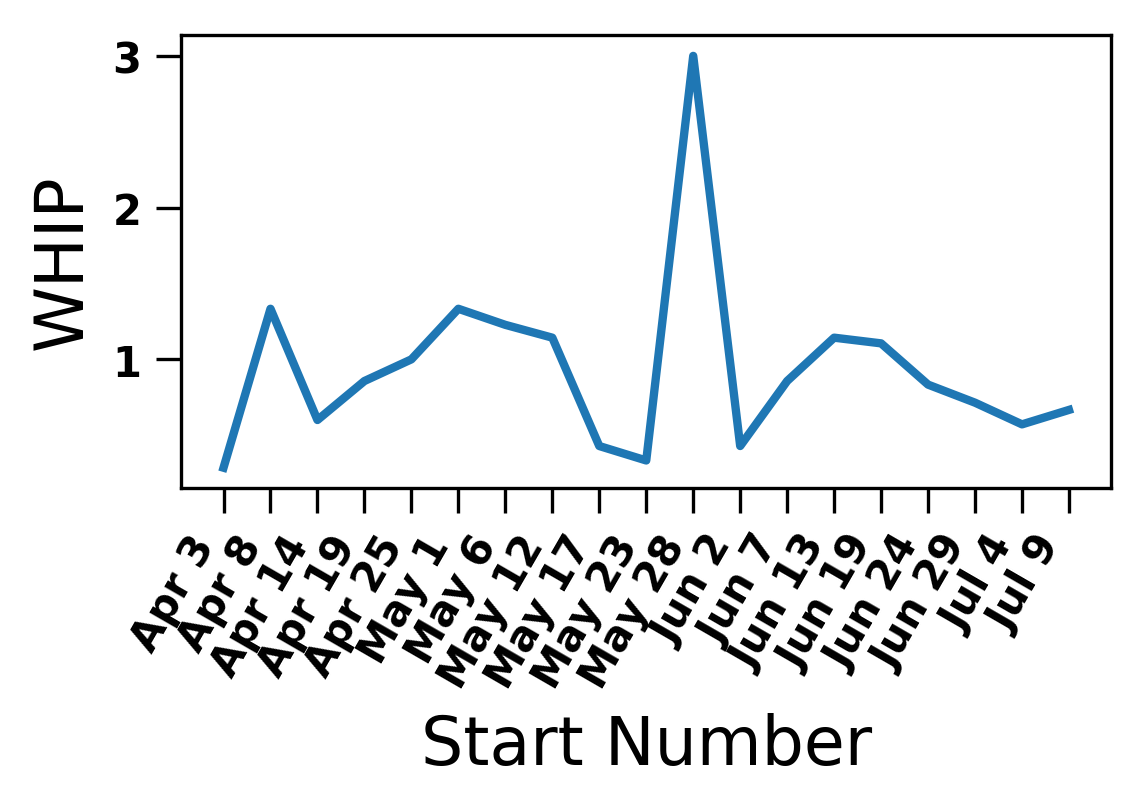

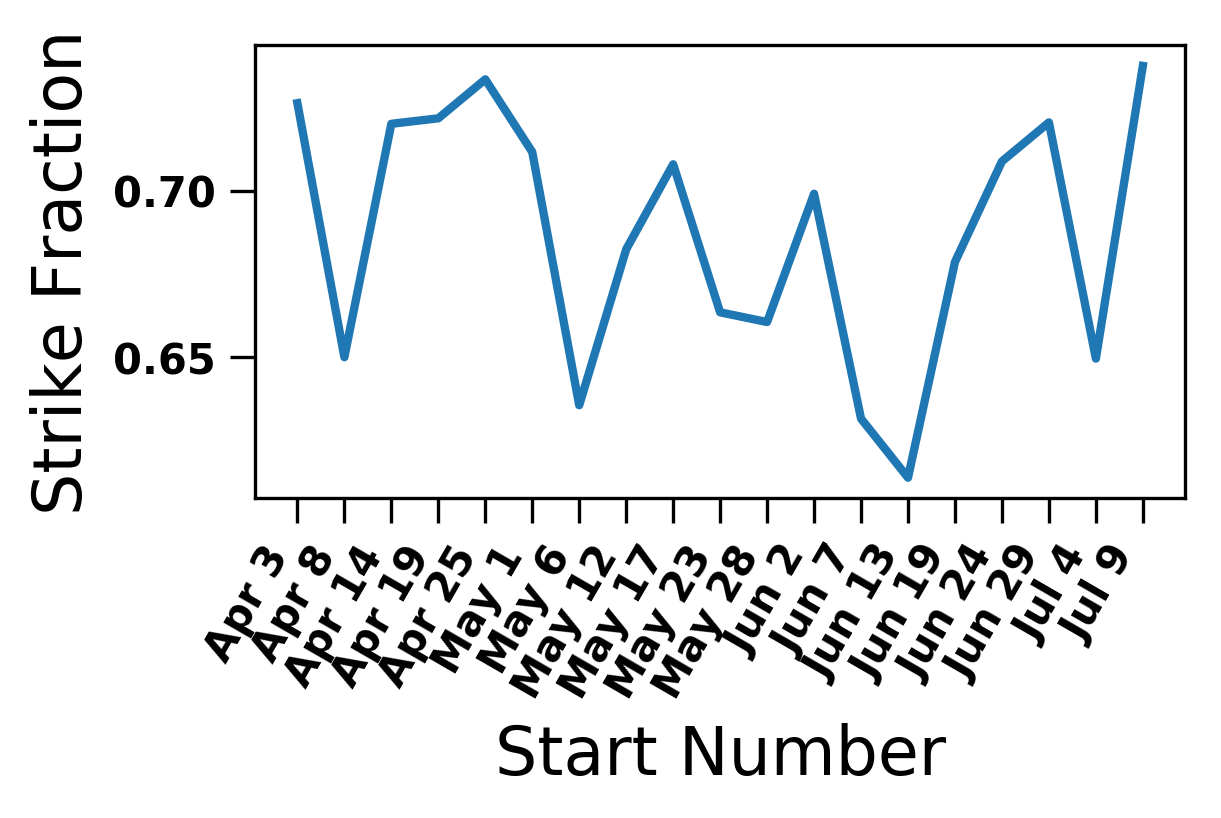

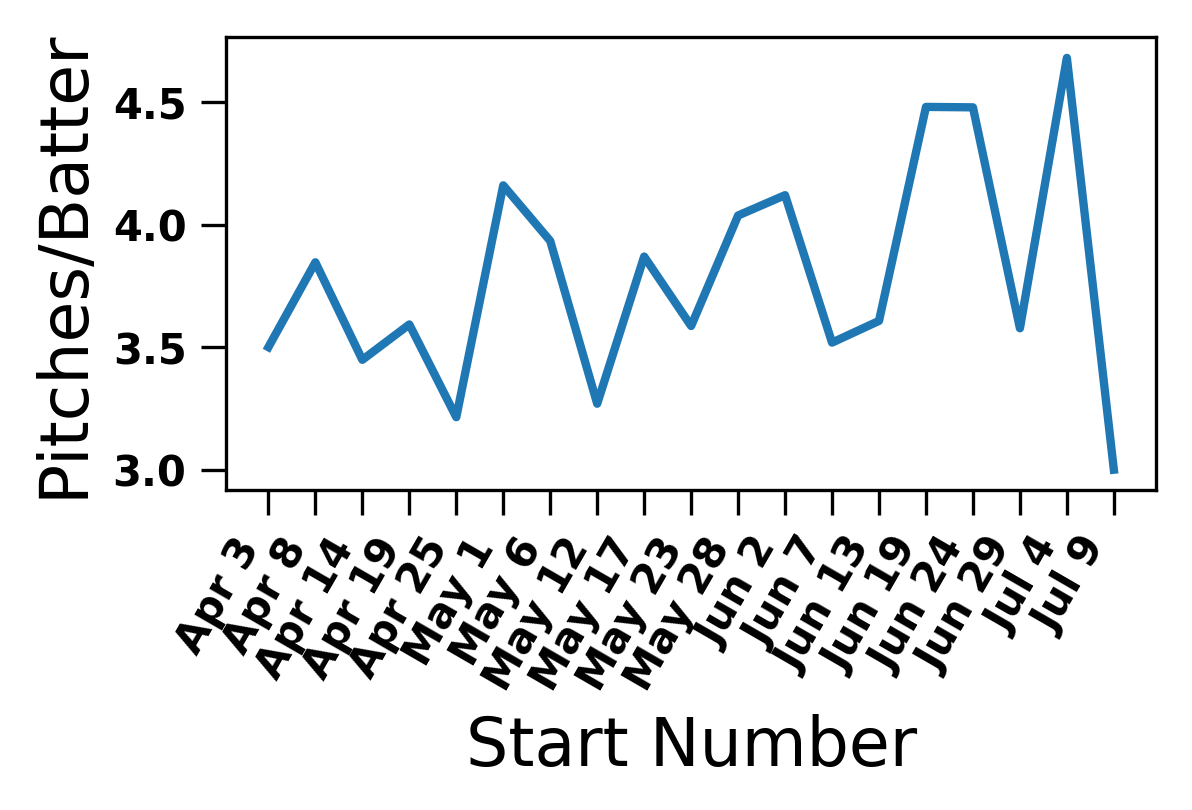

In [68]:

r_inns = np.floor(inns) + 3.33*(np.array(inns)-np.floor(inns))

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(whip)/(np.array(r_inns)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('WHIP',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')

    
    

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(strikes)/(np.array(strikes)+np.array(balls)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Strike Fraction',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')


fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),(np.array(strikes)+np.array(balls))/np.array(tbf))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Pitches/Batter',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')




In [69]:
# what about strikeouts?

teams2 = ['indians']
pname = 'Kluber'
balls = []
strikes = []
inns = []
tbf = []
er = []
whip = []
start_date = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print GameLog[inteam][key]['date'].split(',')[0],' ',
            start_date.append(GameLog[inteam][key]['date'].split(',')[0])
    
        r  = requests.get(GameLog[inteam][key]['box'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        #
        # collect pitch counts
        #

        # for home team setup
        table = soup.findAll('table')[34]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes
                
        # also need to do away setup
        table = soup.findAll('table')[36]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes
            
        #
        # get total batters faced
        #
        table = soup.findAll('table')[14]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                er.append(float([td.get_text() for td in row.find_all("td")][5]))
                whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                            float([td.get_text() for td in row.find_all("td")][6]))
       
        # get total batters faced
        table = soup.findAll('table')[15]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                er.append(float([td.get_text() for td in row.find_all("td")][5]))
                whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                            float([td.get_text() for td in row.find_all("td")][6]))
       
       






Apr 3   Apr 9   Apr 15   Apr 21   Apr 27   May 2   Jun 1   Jun 9   Jun 14   Jun 19   Jun 24   Jun 29   Jul 4   Jul 9  


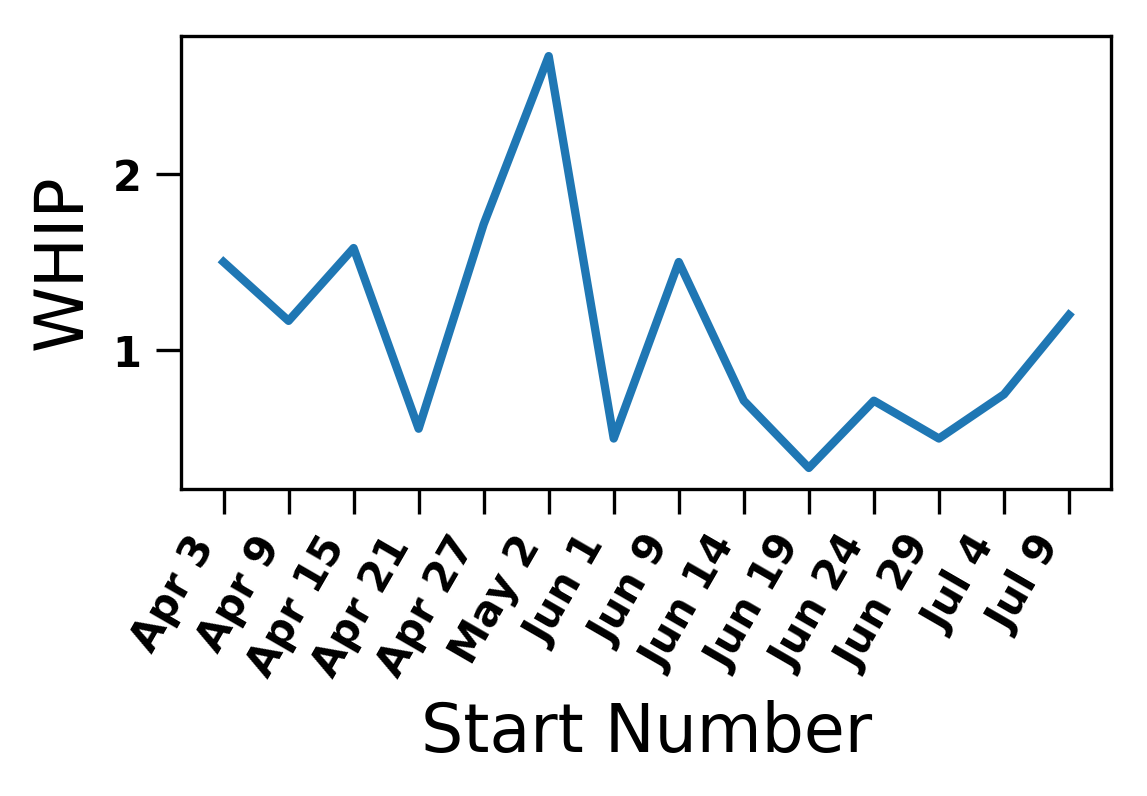

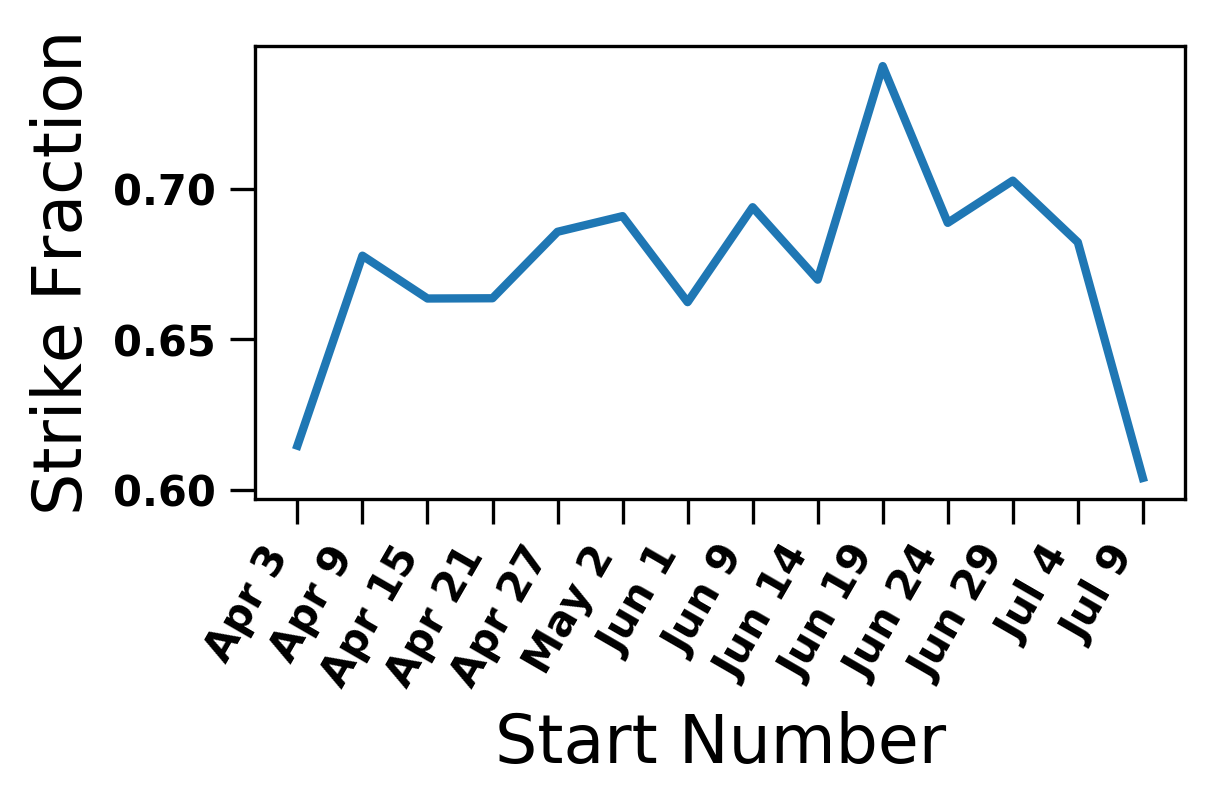

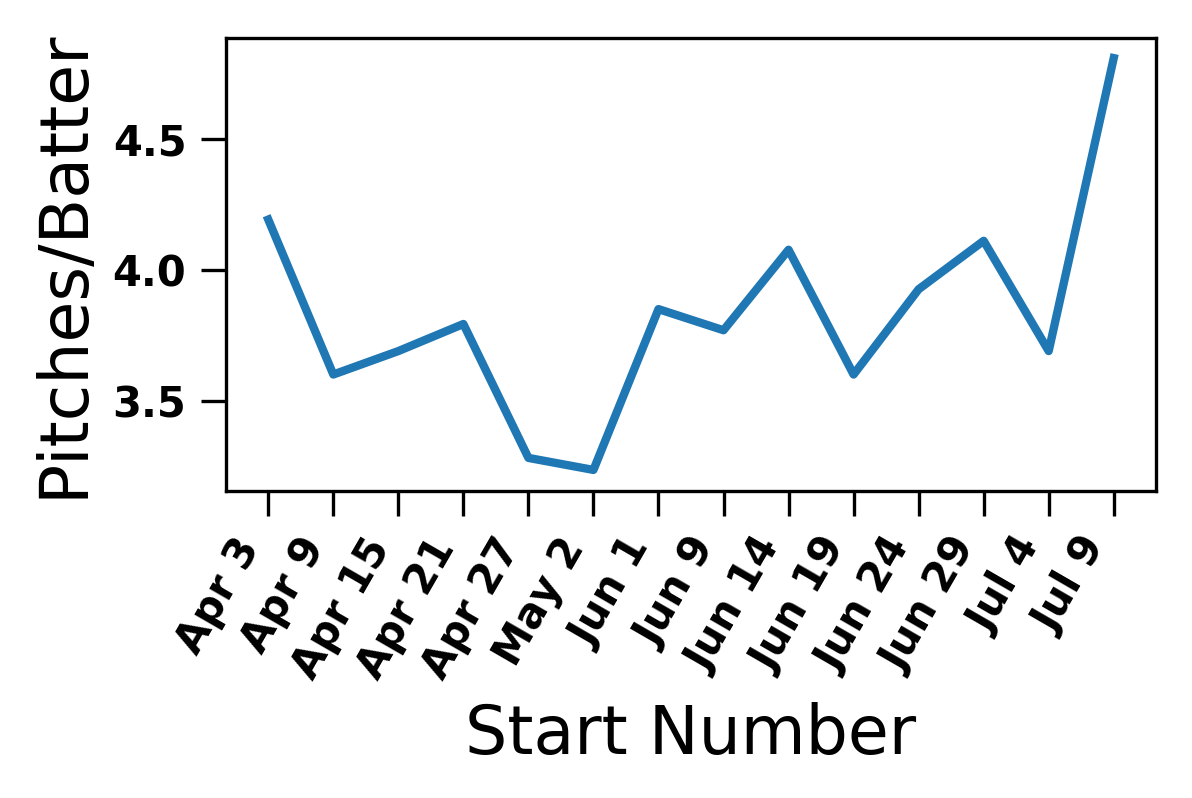

In [70]:

r_inns = np.floor(inns) + 3.33*(np.array(inns)-np.floor(inns))

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(whip)/(np.array(r_inns)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('WHIP',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')

    
    

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(strikes)/(np.array(strikes)+np.array(balls)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Strike Fraction',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')


fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),(np.array(strikes)+np.array(balls))/np.array(tbf))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Pitches/Batter',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')




In [72]:
# what about strikeouts?

teams2 = ['diamondbacks']
pname = 'Walker'
balls = []
strikes = []
inns = []
tbf = []
er = []
whip = []
start_date = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print GameLog[inteam][key]['date'].split(',')[0],' ',
            start_date.append(GameLog[inteam][key]['date'].split(',')[0])
    
        r  = requests.get(GameLog[inteam][key]['box'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        #
        # collect pitch counts
        #

        # for home team setup
        table = soup.findAll('table')[34]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes
                
        # also need to do away setup
        table = soup.findAll('table')[36]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes
            
        #
        # get total batters faced
        #
        table = soup.findAll('table')[14]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                er.append(float([td.get_text() for td in row.find_all("td")][5]))
                whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                            float([td.get_text() for td in row.find_all("td")][6]))
       
        # get total batters faced
        table = soup.findAll('table')[15]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                er.append(float([td.get_text() for td in row.find_all("td")][5]))
                whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                            float([td.get_text() for td in row.find_all("td")][6]))
       
       







Apr 5   Apr 10   Apr 16   Apr 21   Apr 27   May 2   May 7   May 13   May 19   Jun 14   Jun 21   Jun 27   Jul 2   Jul 8  


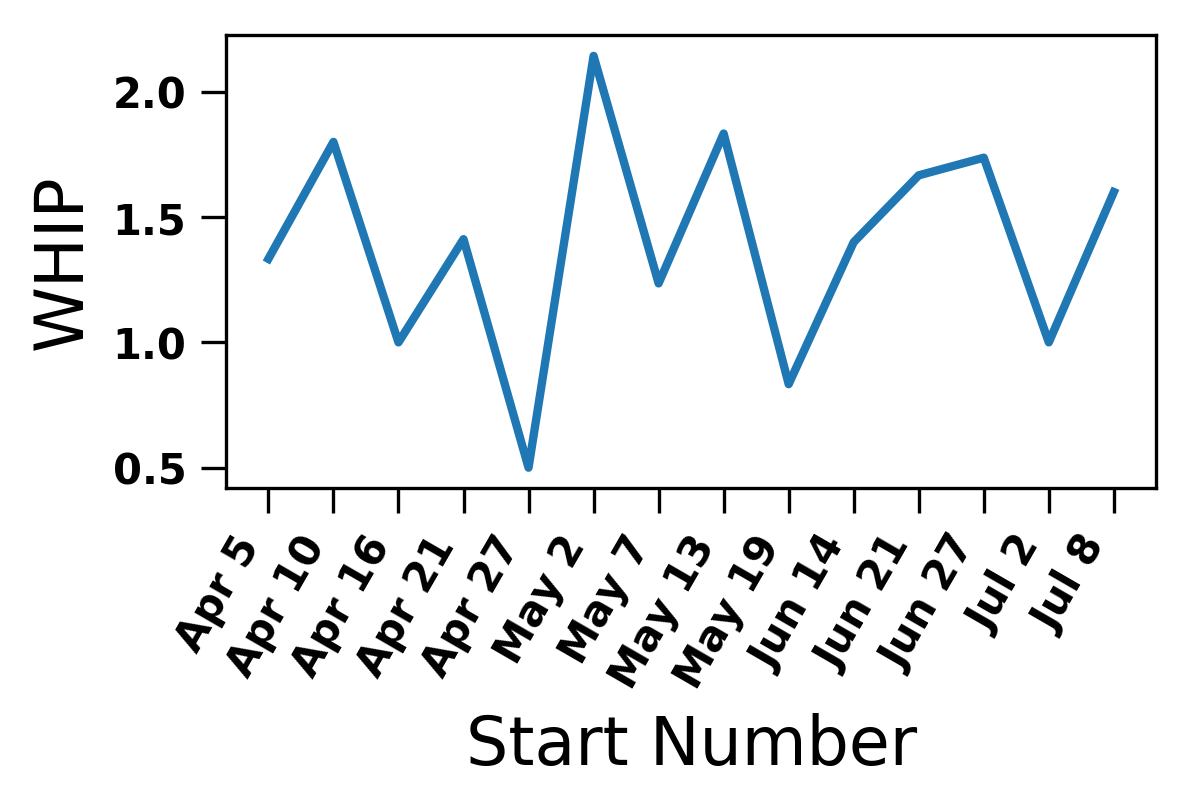

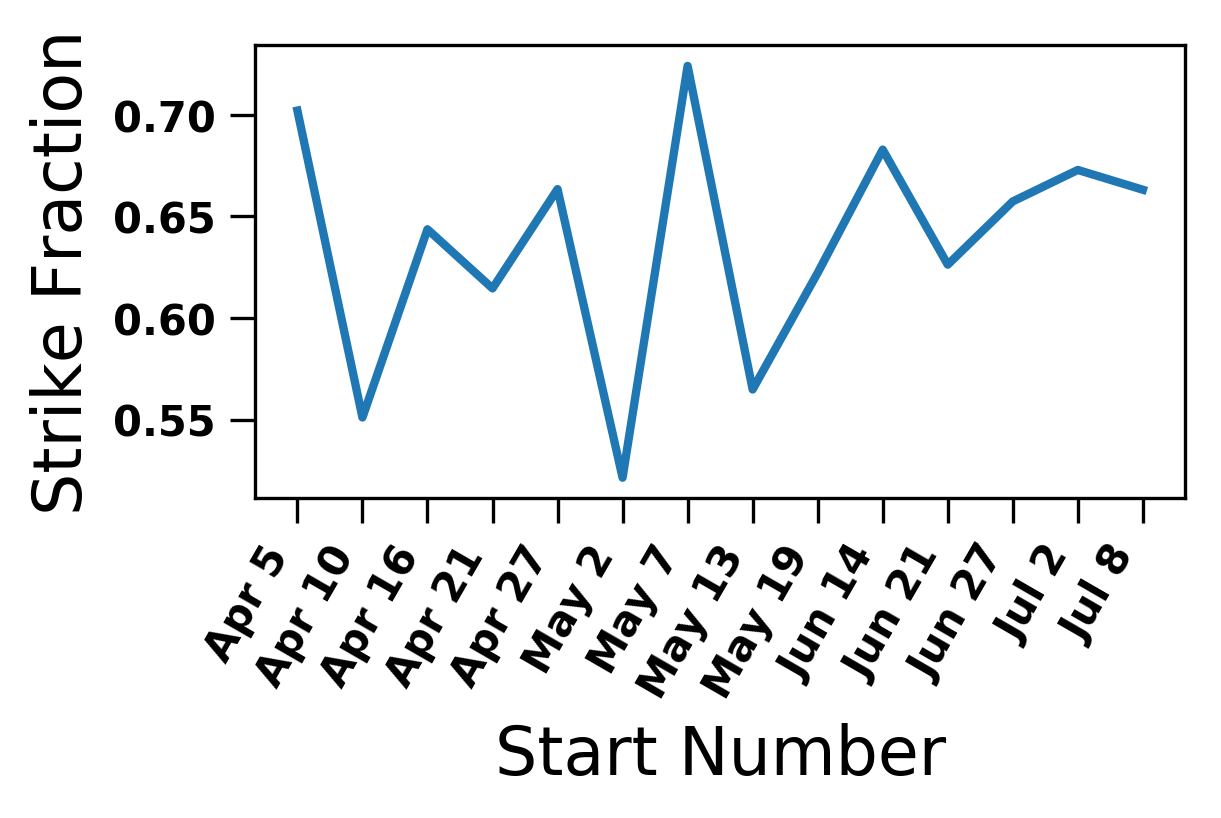

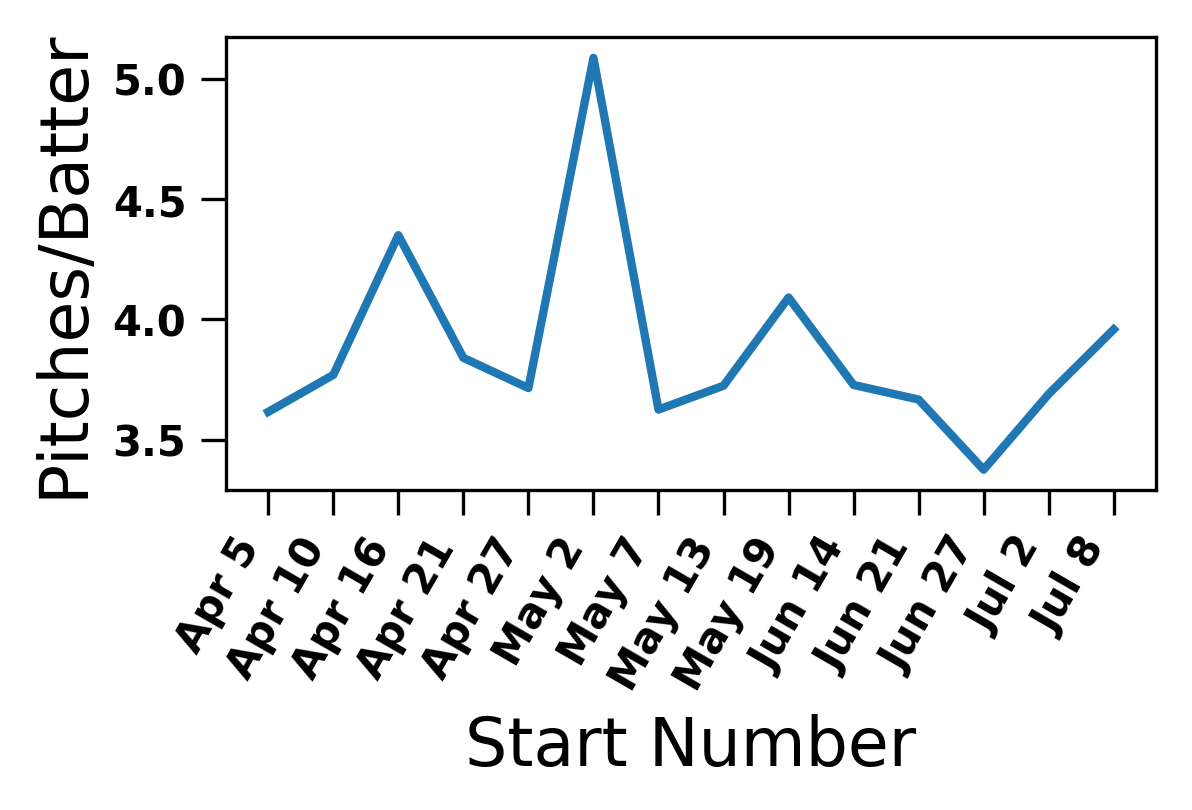

In [73]:

r_inns = np.floor(inns) + 3.33*(np.array(inns)-np.floor(inns))

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(whip)/(np.array(r_inns)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('WHIP',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')

    
    

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(strikes)/(np.array(strikes)+np.array(balls)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Strike Fraction',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')


fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),(np.array(strikes)+np.array(balls))/np.array(tbf))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Pitches/Batter',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')





In [25]:
for indx,key in enumerate(GameLog['dodgers'].keys()[0:1]):
    print GameLog['dodgers'][key]['link']

http://www.fangraphs.com/plays.aspx?date=2017-04-03&team=Dodgers&dh=0&season=2017


In [26]:
r  = requests.get('http://www.fangraphs.com/boxscore.aspx?date=2017-04-03&team=Dodgers&dh=0&season=2017')

data = r.text
    
soup = BeautifulSoup(data)

tables = soup.findAll('table')

tnum = 0
for table in tables:
    
    print tnum
    
    headings = [th.get_text() for th in table.find("tr").find_all("th")]
    print headings
    
    tnum += 1

0
[]
1
[u'S', u'M', u'T', u'W', u'T', u'F', u'S']
2
[u'S', u'M', u'T', u'W', u'T', u'F', u'S']
3
[u'S', u'M', u'T', u'W', u'T', u'F', u'S']
4
[]
5
[]
6
[u'S', u'M', u'T', u'W', u'T', u'F', u'S']
7
[]
8
[]
9
[]
10
[]
11
[u'Name', u'BO', u'PA', u'H', u'HR', u'R', u'RBI', u'BB', u'SO', u'wOBA', u'pLI', u'WPA', u'Name', u'BO', u'PA', u'H', u'HR', u'R', u'RBI', u'BB', u'SO', u'wOBA', u'pLI', u'WPA']
12
[u'Name', u'BO', u'PA', u'H', u'HR', u'R', u'RBI', u'BB', u'SO', u'wOBA', u'pLI', u'WPA']
13
[u'Name', u'BO', u'PA', u'H', u'HR', u'R', u'RBI', u'BB', u'SO', u'wOBA', u'pLI', u'WPA']
14
[u'Name', u'IP', u'TBF', u'H', u'HR', u'ER', u'BB', u'SO', u'FIP', u'pLI', u'WPA']
15
[u'Name', u'IP', u'TBF', u'H', u'HR', u'ER', u'BB', u'SO', u'FIP', u'pLI', u'WPA']
16
[u'Pitcher', u'Player', u'Inn.', u'Outs', u'Base', u'Score', u'Play', u'LI', u'RE', u'WE', u'WPA', u'RE24', u'Score', u'Half']
17
[u'Name', u'PA', u'H', u'HR', u'R', u'RBI', u'SB', u'BB%', u'K%', u'ISO', u'BABIP', u'AVG', u'OBP', u'SLG', u'w

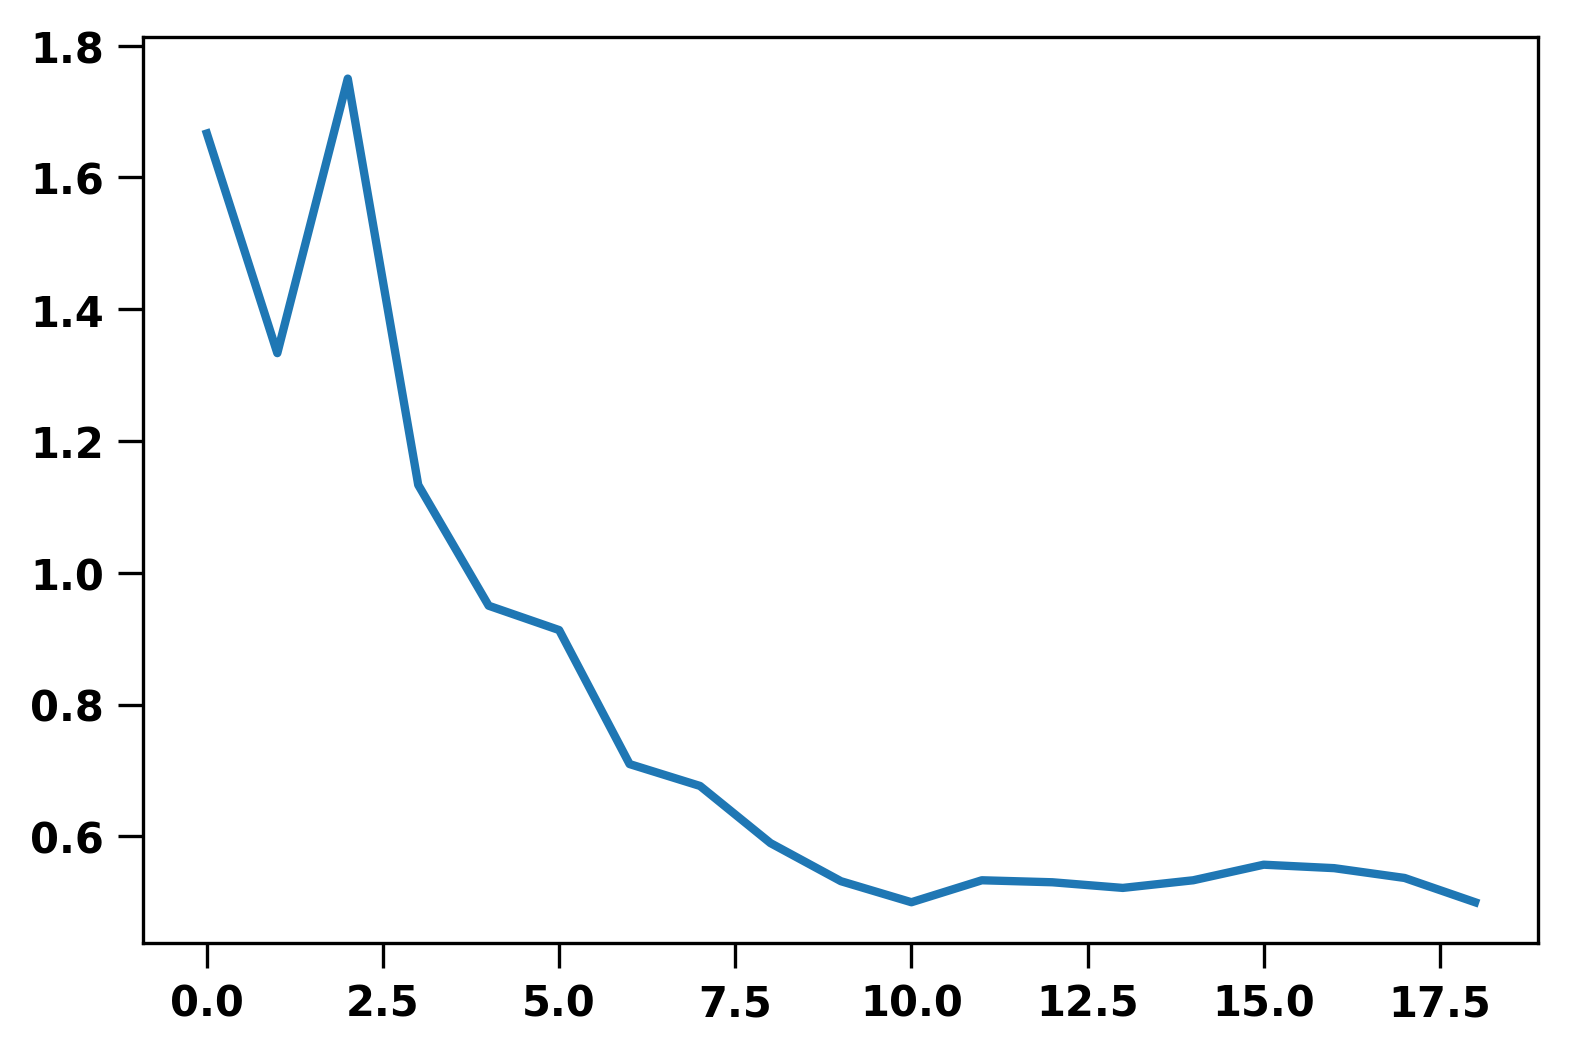

In [24]:
plt.plot(np.cumsum(k_look_log)/np.cumsum(k_swing_log))
#plt.plot(np.cumsum(k_swing_log))

In [11]:
teams2 = ['dodgers']
pname = 'Bellinger'
pa_num = 0

for inteam in teams2:
    
    print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
 
        if pname in GameLog[inteam][key]['home']:
            print '\n\nDate: ',GameLog[inteam][key]['date'].split(',')[0]
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)

        table = soup.findAll('table')[8]

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][1]:
                
                #if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
                #('homered' in [td.get_text() for td in row.find_all("td")][6]):
                    print pa_num,[td.get_text() for td in row.find_all("td")][6]
                
                    pa_num += 1
                

dodgers
0 Cody Bellinger flied out to shortstop (Fliner (Liner)).
1 Cody Bellinger flied out to right (Fliner (Fly)).
2 Cody Bellinger was intentionally walked.
3 Cody Bellinger singled to third (Grounder).
4 Cody Bellinger struck out swinging.
5 Cody Bellinger struck out swinging.
6 Cody Bellinger struck out looking.
7 Cody Bellinger flied out to center (Fliner (Fly)).
8 Cody Bellinger flied out to shortstop (Fly).
9 Cody Bellinger struck out swinging.
10 Cody Bellinger walked.
11 Cody Bellinger struck out looking.
12 Cody Bellinger walked.
13 Cody Bellinger singled to third (Bunt Grounder).
14 Cody Bellinger singled to right (Fliner (Liner)). Adrian Gonzalez out at home. Chase Utley advanced to 2B.
15 Cody Bellinger grounded out to first (Grounder).
16 Cody Bellinger grounded out to shortstop (Grounder).
17 Cody Bellinger grounded out to shortstop (Grounder).
18 Cody Bellinger homered (Fly).
19 Cody Bellinger homered (Fliner (Liner)).
20 Cody Bellinger singled to second (Grounder). A

In [18]:
teams2 = ['nationals']
pname = 'Zimmerman'
pa_num = 0

for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
 
        if pname in GameLog[inteam][key]['home']:
            print '\n\nDate: ',GameLog[inteam][key]['date'].split(',')[0]
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)

        table = soup.findAll('table')[8]

        headings = [th.get_text() for th in table.find("tr").find_all("th")]
        #print headings

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][1]:
                
                #if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
                #('homered' in [td.get_text() for td in row.find_all("td")][6]):
                    print GameLog[inteam][key]['date'].split(',')[0],':',\
                    [td.get_text() for td in row.find_all("td")][2],\
                    [td.get_text() for td in row.find_all("td")][6]
                
                    pa_num += 1
                

Apr 3 : 1 Ryan Zimmerman struck out swinging.
Apr 3 : 4 Ryan Zimmerman singled to left (Fliner (Liner)). Daniel Murphy advanced to 2B.
Apr 3 : 6 Ryan Zimmerman struck out looking.
Apr 3 : 8 Ryan Zimmerman singled to right (Grounder). Bryce Harper advanced to 3B. Daniel Murphy advanced to 2B.
Apr 5 : 2 Ryan Zimmerman homered (Fliner (Fly)).
Apr 5 : 4 Ryan Zimmerman walked.
Apr 5 : 5 Ryan Zimmerman fouled out to third (Fly).
Apr 5 : 7 Ryan Zimmerman out on a dropped third strike.
Apr 6 : 2 Ryan Zimmerman doubled to left (Fliner (Liner)).
Apr 6 : 3 Ryan Zimmerman grounded into a double play to shortstop (Grounder). Daniel Murphy out at second.
Apr 6 : 6 Ryan Zimmerman struck out swinging.
Apr 6 : 8 Ryan Zimmerman homered (Fliner (Fly)).
Apr 6 : 10 Ryan Zimmerman flied out to shortstop (Fly).
Apr 7 : 1 Ryan Zimmerman struck out looking.
Apr 7 : 3 Ryan Zimmerman singled to center (Liner).
Apr 7 : 5 Ryan Zimmerman struck out swinging.
Apr 7 : 6 Ryan Zimmerman grounded out to pitcher (Grounde